In [2]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import layers
from tensorflow.keras import datasets


In [9]:
input_shape = (28,28,1)
num_classes = 10

In [10]:
inputs = layers.Input(shape = input_shape, dtype =tf.float64)

#Feature Extraction
net = layers.Conv2D(32,(3,3),padding = 'same')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,(3,3),padding = 'same')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size=(2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64,(3,3),padding = 'same')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,(3,3),padding = 'same')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size = (2,2))(net)
net = layers.Dropout(0.25)(net)

#Fully Connected

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name ='Basic_CNN')


In [11]:
mnist = datasets.mnist

(train_x,train_y),(test_x,test_y) =mnist.load_data()

train_x =train_x[...,tf.newaxis]
test_x =test_x[...,tf.newaxis]
train_x = train_x/255
test_x = test_x/255

In [13]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x,train_y))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((test_x,test_y))
test_ds = test_ds.batch(32)


In [15]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy')
model.fit(train_ds, epochs = 10000)

Epoch 1/10000
1875/1875 [==============================] - 269s 143ms/step - loss: 0.2753
Epoch 2/10000
1875/1875 [==============================] - 250s 133ms/step - loss: 0.0536
Epoch 3/10000
1875/1875 [==============================] - 250s 134ms/step - loss: 0.0370
Epoch 4/10000
1875/1875 [==============================] - 237s 126ms/step - loss: 0.0330
Epoch 5/10000
1875/1875 [==============================] - 230s 123ms/step - loss: 0.0278
Epoch 6/10000
1291/1875 [===================>..........] - ETA: 1:13 - loss: 0.0224

KeyboardInterrupt: 

In [16]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [18]:
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')
test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')

In [19]:
def train_step(images,labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables ))
    train_loss(loss)
    train_accuracy(labels, predictions)

In [20]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)
    
    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [23]:
for epoch in range(2):
    for images, labels in train_ds:
        train_step(images, labels)
    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)
    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss {}, Test Accuracy: {}'
    
    print(template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100, 
                         ))

Epoch 1, Loss: 0.01287503819912672, Accuracy: 99.61199951171875, Test Loss 0.014909892342984676, Test Accuracy: 99.54000091552734
Epoch 2, Loss: 0.011752482503652573, Accuracy: 99.64692687988281, Test Loss 0.01719997636973858, Test Accuracy: 99.51499938964844


In [25]:
model.evaluate(test_x,test_y,batch_size=32)

313/313 [==============================] - 6s 20ms/step - loss: 0.0195


0.01952124759554863

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
test_image = test_x[0,:,:,0]
test_image.shape

(28, 28)

In [28]:
pred = model.predict(test_image.reshape(1,28,28,1))

In [29]:
pred.shape

(1, 10)

In [30]:
test_batch = test_x[:32]

In [31]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

In [33]:
np.argmax(preds,-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1], dtype=int64)

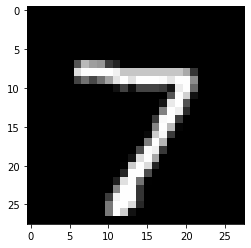

In [34]:
plt.imshow(test_batch[0,:,:,0],'gray')
plt.show()